# Actividad 1. Análisis de texto


**Instrucciones.**

Una de dos:

- Aplicar la técnica de _stem_ para analizar la frecuencia de palabras de esta obra
- Implementar una manera de obtener la frecuencia de $n$-gramas de este libro (_Moby-Dick_) antes de que se acabe la clase. Subir la solución propuesta al repositorio

## Stemming

La técnica de **stem** (también llamada stemming) es un proceso en el procesamiento de lenguaje natural (NLP) que consiste en reducir las palabras a su raíz o forma básica (llamada stem en inglés). A diferencia de la lematización, el stemming no necesariamente produce palabras reales, sino que busca simplemente encontrar una forma raíz que sea común a las variantes de la palabra.  

Por ejemplo:
- Running, runner, ran → run
- Computing, computer, computed → comput


El propósito de esta técnica es ayudar a los algoritmos de NLP a tratar palabras relacionadas como equivalentes, lo que puede ser útil en tareas como análisis de sentimientos, búsqueda de información o generación de n-gramas.

## Código. 

link:  https://www.gutenberg.org/ebooks/70322

### Líbrerias

In [6]:
# Importar librerias

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Descargar recursos necesarios de NLTK
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicevillalpando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Cargar y Procesar el Texto

In [8]:
# Cargar el libro

with open("Amor y Llanto.txt", "r", encoding = "utf-8") as file:
    texto = file.read()


In [9]:
# Convertir a minúsculas

texto = texto.lower()


In [10]:
# Tokenizar el texto

tokens = word_tokenize(texto)


In [11]:
# Filtrar solo palabras alfabéticas (sin signos de puntuación ni números)

palabras = [palabra for palabra in tokens if palabra.isalpha()]


### Aplicar Stemming

In [13]:
# Crear instancia del PorterStemmer
porter = PorterStemmer()

# Aplicar stemming a cada palabra
stems = [porter.stem(palabra) for palabra in palabras]


### Calcular la frecuencia de las raíces

In [15]:

frecuencias = Counter(stems)


In [16]:
# Mostrar las 10 raíces más comunes

print("Raíces más comunes: \n")
for raiz, frecuencia in frecuencias.most_common(10):
    print(f"{raiz}: {frecuencia}")


Raíces más comunes: 

de: 4725
la: 3707
y: 2858
que: 2678
a: 2430
su: 2283
el: 2257
en: 1903
lo: 1200
con: 1012


### Visualización de datos

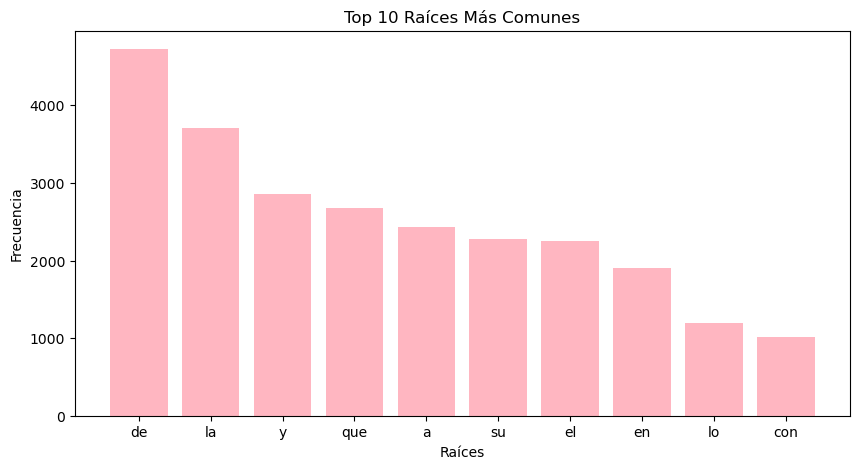

In [18]:

# Obtener las 10 raíces más comunes
top_raices = frecuencias.most_common(10)
raices, conteos = zip(*top_raices)

# Crear gráfico de barras
plt.figure(figsize = (10,5))
plt.bar(raices, conteos, color = 'lightpink')
plt.title("Top 10 Raíces Más Comunes")
plt.xlabel("Raíces")
plt.ylabel("Frecuencia")
plt.show()



### Snowball Stemmer

In [20]:
from nltk.stem.snowball import SnowballStemmer


In [21]:
# Aplicar SnowballStemmer para español

stemmer = SnowballStemmer("spanish")
stems = [(palabra, stemmer.stem(palabra)) for palabra in palabras]  # Crear pares (original, raíz)


In [22]:
# Mostrar las primeras 10 palabras con sus raíces

print("Palabras originales y sus raíces (SnowballStemmer): \n")
for original, stem in stems[:10]:  # Limitar a las primeras 10
    print(f"Palabra original: {original} -> Raíz: {stem}")
    

Palabras originales y sus raíces (SnowballStemmer): 

Palabra original: project -> Raíz: project
Palabra original: gutenberg -> Raíz: gutenberg
Palabra original: ebook -> Raíz: ebook
Palabra original: of -> Raíz: of
Palabra original: amor -> Raíz: amor
Palabra original: y -> Raíz: y
Palabra original: llanto -> Raíz: llant
Palabra original: this -> Raíz: this
Palabra original: ebook -> Raíz: ebook
Palabra original: is -> Raíz: is


In [23]:
# Crear un diccionario de frecuencias para palabras originales y raíces

frecuencias_original = Counter(palabras)
frecuencias_stemming = Counter([stem for _, stem in stems])


In [24]:
# Mostrar las raíces más comunes tras stemming

print("Top 10 raíces más comunes: \n")
top_10_raices = frecuencias_stemming.most_common(10)
for raiz, frecuencia in top_10_raices:
    print(f"{raiz}: {frecuencia}")


Top 10 raíces más comunes: 

de: 4726
la: 3179
y: 2858
que: 2754
el: 2434
a: 2430
en: 1903
su: 1571
con: 1012
se: 945


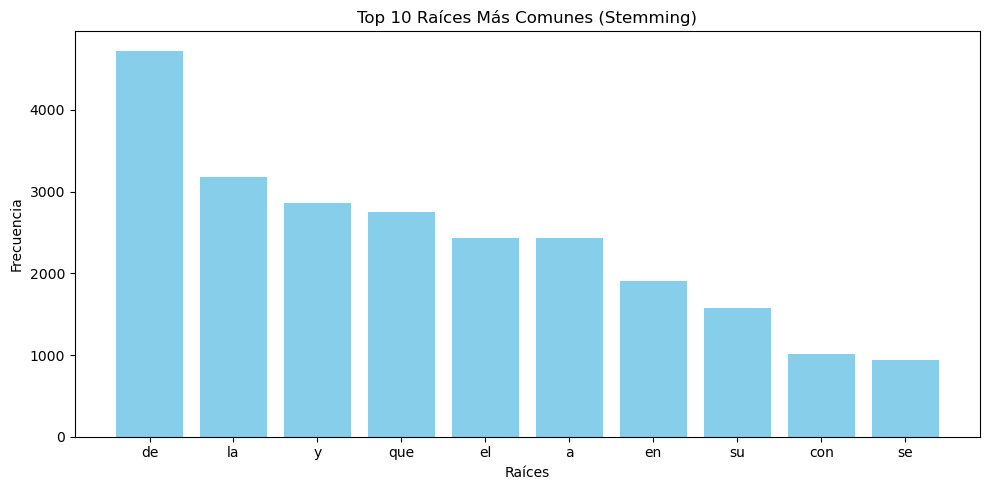

In [25]:
# Graficar las raíces más comunes
# Representación gráfica del Top 10 de raíces
raices, valores = zip(*top_10_raices)

plt.figure(figsize = (10, 5))
plt.bar(raices, valores, color = "skyblue")
plt.title("Top 10 Raíces Más Comunes (Stemming)")
plt.xlabel("Raíces")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()